In [18]:
import pandas as pd
import numpy as np
import pickle
from collections import OrderedDict
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [19]:
%matplotlib inline

# 1 导入drugbank数据集和SIDER数据集

In [3]:
drugbank_df = pd.read_table('../data/drugbank.tsv')
protient_df = pd.read_table('../data/proteins.tsv')

with open('../data/sider.pkl', 'rb') as f:
    sider_df = pickle.load(f)

In [4]:
# 所有药物
drugbank_df

drugbank_id                 name     type                    groups  \
0         DB00001            Lepirudin  biotech                  approved   
1         DB00002            Cetuximab  biotech                  approved   
2         DB00003         Dornase alfa  biotech                  approved   
3         DB00004  Denileukin diftitox  biotech  approved|investigational   
4         DB00005           Etanercept  biotech  approved|investigational   
...           ...                  ...      ...                       ...   
14310     DB16420         Vibostolimab  biotech           investigational   
14311     DB16421          Volagidemab  biotech           investigational   
14312     DB16422          Quavonlimab  biotech           investigational   
14313     DB16423                AK119  biotech           investigational   
14314     DB16424            Allocetra  biotech           investigational   

      atc_codes                                         categories  \
0       B01AE02  Amino Acids, Peptides, and Proteins|Anticoagul...   
1       L01XC06  Amino Acids, Peptides, and Proteins|Antibodies...   
2       R05CB13  Amino Acids, Peptides, and Proteins|Cough and ...   
3       L01XX29  ADP Ribose Transferases|Amino Acids, Peptides,...   
4       L04AB01  Agents reducing cytokine levels|Amino Acids, P...   
...         ...                                                ...   
14310       NaN                                                NaN   
14311       NaN  Amino Acids, Peptides, and Proteins|Antibodies...   
14312       NaN                                                NaN   
14313       NaN                                                NaN   
14314       NaN                                                NaN   

                                         indication_text  \
0      For the treatment of heparin-induced thrombocy...   
1      Cetuximab, used in combination with irinotecan...   
2      Used as adjunct therapy in the treatment of cy...   
3             For treatment of cutaneous T-cell lymphoma   
4      Etanercept is indicated for the treatment of m...   
...                                                  ...   
14310                                                NaN   
14311                                                NaN   
14312                                                NaN   
14313                                                NaN   
14314                                                NaN   

                                             description  
0      Lepirudin is identical to natural hirudin exce...  
1      Cetuximab is an epidermal growth factor recept...  
2      Dornase alfa is a biosynthetic form of human d...  
3      A recombinant DNA-derived cytotoxic protein co...  
4      Dimeric fusion protein consisting of the extra...  
...                                                  ...  
14310  Vibostolimab is under investigation in clinica...  
14311  Volagidemab is under investigation in clinical...  
14312  Quavonlimab is under investigation in clinical...  
14313  AK119 is a humanized anti-CD73 monoclonal anti...  
14314  Allocetra is a novel therapy where billions of...  

[14315 rows x 8 columns]

In [8]:
drugbank_df[drugbank_df.drugbank_id == 'DB09018']

drugbank_id        name            type           groups atc_codes  \
8028     DB09018  Bromopride  small molecule  investigational   A03FA04   

                                             categories  \
8028  Acids, Carbocyclic|Alimentary Tract and Metabo...   

                                        indication_text  \
8028  Bromopride in indicated in the treatment of na...   

                                            description  
8028  Bromopride is a dopamine antagonist used as an...

In [24]:
# 批准药物
drugbank_df[drugbank_df.groups.map(lambda x: 'approved' in x)]

drugbank_id                      name            type  \
0         DB00001                 Lepirudin         biotech   
1         DB00002                 Cetuximab         biotech   
2         DB00003              Dornase alfa         biotech   
3         DB00004       Denileukin diftitox         biotech   
4         DB00005                Etanercept         biotech   
...           ...                       ...             ...   
13877     DB15986              Cinnamon oil         biotech   
13898     DB16007    Rurioctocog alfa pegol         biotech   
13910     DB16019  Gallium Ga-68 gozetotide  small molecule   
13913     DB16022             Thenyldiamine  small molecule   
14275     DB16385                 Ansuvimab         biotech   

                         groups atc_codes  \
0                      approved   B01AE02   
1                      approved   L01XC06   
2                      approved   R05CB13   
3      approved|investigational   L01XX29   
4      approved|investigational   L04AB01   
...                         ...       ...   
13877     approved|experimental       NaN   
13898     approved|experimental       NaN   
13910                  approved       NaN   
13913     approved|experimental       NaN   
14275  approved|investigational       NaN   

                                              categories  \
0      Amino Acids, Peptides, and Proteins|Anticoagul...   
1      Amino Acids, Peptides, and Proteins|Antibodies...   
2      Amino Acids, Peptides, and Proteins|Cough and ...   
3      ADP Ribose Transferases|Amino Acids, Peptides,...   
4      Agents reducing cytokine levels|Amino Acids, P...   
...                                                  ...   
13877                                                NaN   
13898                                                NaN   
13910  Acetates|Acids, Acyclic|Amines|Amino Acids, Pe...   
13913                                                NaN   
14275                                                NaN   

                                         indication_text  \
0      For the treatment of heparin-induced thrombocy...   
1      Cetuximab, used in combination with irinotecan...   
2      Used as adjunct therapy in the treatment of cy...   
3             For treatment of cutaneous T-cell lymphoma   
4      Etanercept is indicated for the treatment of m...   
...                                                  ...   
13877                                                NaN   
13898                                                NaN   
13910  Gallium Ga-68 gozetotide, or Gallium Ga-68 PSM...   
13913                                                NaN   
14275                                                NaN   

                                             description  
0      Lepirudin is identical to natural hirudin exce...  
1      Cetuximab is an epidermal growth factor recept...  
2      Dornase alfa is a biosynthetic form of human d...  
3      A recombinant DNA-derived cytotoxic protein co...  
4      Dimeric fusion protein consisting of the extra...  
...                                                  ...  
13877                                                NaN  
13898                                                NaN  
13910  Gallium (Ga) 68 prostate-specific membrane ant...  
13913                                                NaN  
14275  Infection with pathogenic filoviruses, such as...  

[4270 rows x 8 columns]

In [10]:
# 药物蛋白质特征数据
protient_df

drugbank_id     category                              organism  \
0         DB00001       target                                Humans   
1         DB00002       target                                Humans   
2         DB00002       target                                Humans   
3         DB00002       target                                Humans   
4         DB00002       target                                Humans   
...           ...          ...                                   ...   
27164     DB15982  transporter                                Humans   
27165     DB16019       target                                Humans   
27166     DB16353       target                                Humans   
27167     DB16370       target                                Humans   
27168     DB16385       target  Zaire ebolavirus (strain Mayinga-76)   

      known_action     actions uniprot_id  
0              yes   inhibitor     P00734  
1              yes  antagonist     P00533  
2          unknown         NaN     O75015  
3          unknown         NaN     P02745  
4          unknown         NaN     P02746  
...            ...         ...        ...  
27164      unknown   substrate     Q9UNQ0  
27165          yes      binder     P07288  
27166          yes   inhibitor     P23467  
27167          yes   inhibitor     P28907  
27168          yes  antagonist     Q05320  

[27169 rows x 6 columns]

In [12]:
# SIDER数据集
sider_df

cid_code   drugname atc_code indiction_MedDRA_term  \
0        CID100000085  carnitine  A16AA01              C0015544   
1        CID100000085  carnitine  A16AA01              C0015544   
2        CID100000085  carnitine  A16AA01              C0015544   
3        CID100000085  carnitine  A16AA01              C0015544   
4        CID100000085  carnitine  A16AA01              C0015544   
...               ...        ...      ...                   ...   
5143485  CID171306834       K779  L03AB05              C0856536   
5143486  CID171306834       K779  L03AB05              C0856536   
5143487  CID171306834       K779  L03AB05              C0856536   
5143488  CID171306834       K779  L03AB05              C0856536   
5143489  CID171306834       K779  L03AB05              C0856536   

                          indication_name se_MedDRA_term              se_name  
0                       Failure to thrive       C0000729     Abdominal cramps  
1                       Failure to thrive       C0000737       Abdominal pain  
2                       Failure to thrive       C0002418            Amblyopia  
3                       Failure to thrive       C0002871              Anaemia  
4                       Failure to thrive       C0003123             Anorexia  
...                                   ...            ...                  ...  
5143485  Philadelphia chromosome positive       C2830004           Somnolence  
5143486  Philadelphia chromosome positive       C2979982  Vaginal haemorrhage  
5143487  Philadelphia chromosome positive       C3203358      Hypoventilation  
5143488  Philadelphia chromosome positive       C3665386      Abnormal vision  
5143489  Philadelphia chromosome positive       C3665596                Warts  

[4931345 rows x 7 columns]

In [74]:
# 删除多余字段
sider_df.drop(['cid_code', 'drugname'], axis=1, inplace=True)

# 重置字段名
sider_df.columns = ['atc_code', 'indication', 'indication_name', 'sideeffect', 'sideeffect_name']
sider_df

atc_code indication                   indication_name sideeffect  \
0        A16AA01   C0015544                 Failure to thrive   C0000729   
1        A16AA01   C0015544                 Failure to thrive   C0000737   
2        A16AA01   C0015544                 Failure to thrive   C0002418   
3        A16AA01   C0015544                 Failure to thrive   C0002871   
4        A16AA01   C0015544                 Failure to thrive   C0003123   
...          ...        ...                               ...        ...   
5143485  L03AB05   C0856536  Philadelphia chromosome positive   C2830004   
5143486  L03AB05   C0856536  Philadelphia chromosome positive   C2979982   
5143487  L03AB05   C0856536  Philadelphia chromosome positive   C3203358   
5143488  L03AB05   C0856536  Philadelphia chromosome positive   C3665386   
5143489  L03AB05   C0856536  Philadelphia chromosome positive   C3665596   

             sideeffect_name  
0           Abdominal cramps  
1             Abdominal pain  
2                  Amblyopia  
3                    Anaemia  
4                   Anorexia  
...                      ...  
5143485           Somnolence  
5143486  Vaginal haemorrhage  
5143487      Hypoventilation  
5143488      Abnormal vision  
5143489                Warts  

[4931345 rows x 5 columns]

# 2 各特征基本分析

In [16]:
# 蛋白质类别及对应数量
protient_df.category.value_counts()

target         18154
enzyme          5157
transporter     3081
carrier          777
Name: category, dtype: int64

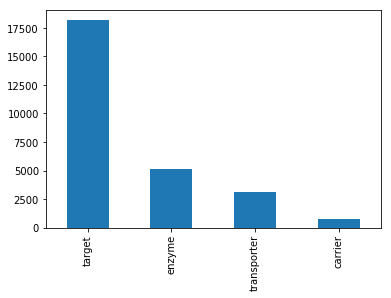

In [20]:
protient_df.category.value_counts().plot(kind='bar')

In [54]:
# 蛋白质种类
len(set(protient_df.uniprot_id))

5004

In [29]:
# 药物类型
drugbank_df.type.value_counts()

small molecule    11834
biotech            2481
Name: type, dtype: int64

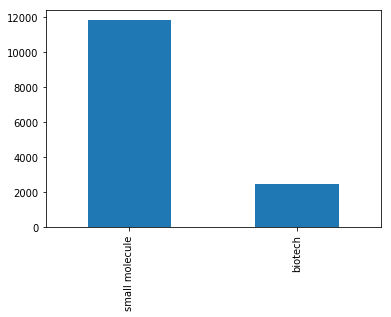

In [30]:
drugbank_df.type.value_counts().plot(kind='bar')

In [21]:
# SIDER中药物适应症种类
len(set(sider_df.indiction_MedDRA_term))

2606

In [22]:
# SIDER中药物不良反应种类
len(set(sider_df.se_MedDRA_term))

5514

In [28]:
# drugbank数据集中不具有适应症特征的药物数量
drugbank_df.indication_text.isnull().sum()

10284

In [31]:
# 批准药物
approved_df = drugbank_df[drugbank_df.groups.apply(lambda x: 'approved' in x)]
approved_df

drugbank_id                      name            type  \
0         DB00001                 Lepirudin         biotech   
1         DB00002                 Cetuximab         biotech   
2         DB00003              Dornase alfa         biotech   
3         DB00004       Denileukin diftitox         biotech   
4         DB00005                Etanercept         biotech   
...           ...                       ...             ...   
13877     DB15986              Cinnamon oil         biotech   
13898     DB16007    Rurioctocog alfa pegol         biotech   
13910     DB16019  Gallium Ga-68 gozetotide  small molecule   
13913     DB16022             Thenyldiamine  small molecule   
14275     DB16385                 Ansuvimab         biotech   

                         groups atc_codes  \
0                      approved   B01AE02   
1                      approved   L01XC06   
2                      approved   R05CB13   
3      approved|investigational   L01XX29   
4      approved|investigational   L04AB01   
...                         ...       ...   
13877     approved|experimental       NaN   
13898     approved|experimental       NaN   
13910                  approved       NaN   
13913     approved|experimental       NaN   
14275  approved|investigational       NaN   

                                              categories  \
0      Amino Acids, Peptides, and Proteins|Anticoagul...   
1      Amino Acids, Peptides, and Proteins|Antibodies...   
2      Amino Acids, Peptides, and Proteins|Cough and ...   
3      ADP Ribose Transferases|Amino Acids, Peptides,...   
4      Agents reducing cytokine levels|Amino Acids, P...   
...                                                  ...   
13877                                                NaN   
13898                                                NaN   
13910  Acetates|Acids, Acyclic|Amines|Amino Acids, Pe...   
13913                                                NaN   
14275                                                NaN   

                                         indication_text  \
0      For the treatment of heparin-induced thrombocy...   
1      Cetuximab, used in combination with irinotecan...   
2      Used as adjunct therapy in the treatment of cy...   
3             For treatment of cutaneous T-cell lymphoma   
4      Etanercept is indicated for the treatment of m...   
...                                                  ...   
13877                                                NaN   
13898                                                NaN   
13910  Gallium Ga-68 gozetotide, or Gallium Ga-68 PSM...   
13913                                                NaN   
14275                                                NaN   

                                             description  
0      Lepirudin is identical to natural hirudin exce...  
1      Cetuximab is an epidermal growth factor recept...  
2      Dornase alfa is a biosynthetic form of human d...  
3      A recombinant DNA-derived cytotoxic protein co...  
4      Dimeric fusion protein consisting of the extra...  
...                                                  ...  
13877                                                NaN  
13898                                                NaN  
13910  Gallium (Ga) 68 prostate-specific membrane ant...  
13913                                                NaN  
14275  Infection with pathogenic filoviruses, such as...  

[4270 rows x 8 columns]

In [32]:
# 获取批准药物的drugbank_id
approved_id = approved_df.drugbank_id

# 3 获取drugbank数据集中drug-atc对
- 主要是为了处理一种药物可能对应多个atc编码的情况

In [34]:
# 获取所有drug-atc对

def get_drugbankid_atc_pair(drugbank_df):

    id_atc = drugbank_df[['drugbank_id', 'atc_codes']]
    # 定义一个空列表接收所有有序字典信息
    id_atc_list = []

    for i in range(len(id_atc)):
        # 初始化一个有序字典接收drugban_id和atc_codes
        id_atc_dict = OrderedDict()

        row_data = id_atc.iloc[i]
        drugbank_id = row_data[0]
        atc_codes = row_data[1]

        # 判断是否存在atc_codes
        if str(atc_codes) == 'nan':
            id_atc_dict['drugbank_id'] = drugbank_id
            id_atc_dict['atc_code'] = atc_codes
            id_atc_list.append(id_atc_dict)

        elif len(atc_codes) == 7:
            id_atc_dict['drugbank_id'] = drugbank_id
            id_atc_dict['atc_code'] = atc_codes
            id_atc_list.append(id_atc_dict)

        else:
            atc_codes_list = atc_codes.split('|')
            if len(atc_codes_list) == 1:
                id_atc_dict['drugbank_id'] = drugbank_id
                id_atc_dict['atc_code'] = atc_codes_list[0]
                id_atc_list.append(id_atc_dict)
            else:    
                for j in range(len(atc_codes_list)):
                    id_atc_dict['drugbank_id'] = drugbank_id
                    id_atc_dict['atc_code'] = atc_codes_list[j]
                    id_atc_list.append(id_atc_dict)   
                    
    id_atc_df = pd.DataFrame(id_atc_list)
    return id_atc_df


In [36]:
drugbankid_atc_pair = get_drugbankid_atc_pair(drugbank_df)

In [37]:
drugbankid_atc_pair

drugbank_id atc_code
0         DB00001  B01AE02
1         DB00002  L01XC06
2         DB00003  R05CB13
3         DB00004  L01XX29
4         DB00005  L04AB01
...           ...      ...
16201     DB16420      NaN
16202     DB16421      NaN
16203     DB16422      NaN
16204     DB16423      NaN
16205     DB16424      NaN

[16206 rows x 2 columns]

# 4 拼接drugbank数据集和SIDER数据集
- 使用merge进行左连接

In [75]:
drugbank_sider_df = drugbankid_atc_pair.merge(sider_df, on='atc_code', how='left')

In [76]:
drugbank_sider_df

drugbank_id atc_code indication  indication_name sideeffect  \
0           DB00001  B01AE02   C0002965  Angina unstable   C0000833   
1           DB00001  B01AE02   C0002965  Angina unstable   C0002792   
2           DB00001  B01AE02   C0002965  Angina unstable   C0002871   
3           DB00001  B01AE02   C0002965  Angina unstable   C0002994   
4           DB00001  B01AE02   C0002965  Angina unstable   C0006266   
...             ...      ...        ...              ...        ...   
4531632     DB16420      NaN        NaN              NaN        NaN   
4531633     DB16421      NaN        NaN              NaN        NaN   
4531634     DB16422      NaN        NaN              NaN        NaN   
4531635     DB16423      NaN        NaN              NaN        NaN   
4531636     DB16424      NaN        NaN              NaN        NaN   

            sideeffect_name  
0                   Abscess  
1        Anaphylactic shock  
2                   Anaemia  
3                Angioedema  
4              Bronchospasm  
...                     ...  
4531632                 NaN  
4531633                 NaN  
4531634                 NaN  
4531635                 NaN  
4531636                 NaN  

[4531637 rows x 6 columns]

# 5 获取三元组
- drug-target
- drug-transporter
- drug-enzyme
- drug-carrier
- drug-indication
- drug-sideeffect

## 5.1 获取drug-target三元组

In [121]:
# 获取drug-target对
drug_target_df = protient_df[protient_df.category == 'target'][['drugbank_id', 'category', 'uniprot_id']].reset_index(drop=True)

In [122]:
drug_target_df

drugbank_id category uniprot_id
0         DB00001   target     P00734
1         DB00002   target     P00533
2         DB00002   target     O75015
3         DB00002   target     P02745
4         DB00002   target     P02746
...           ...      ...        ...
18149     DB15982   target     P03952
18150     DB16019   target     P07288
18151     DB16353   target     P23467
18152     DB16370   target     P28907
18153     DB16385   target     Q05320

[18154 rows x 3 columns]

In [123]:
# target种类
len(set(drug_target_df.uniprot_id))

4703

In [124]:
# 具有target特征的药物种类
len(set(drug_target_df.drugbank_id))

7454

In [125]:
# drug-target
drug_target_triplets = pd.DataFrame({
    'subject':drug_target_df.drugbank_id,
    'relation':['has_target' for i in range(len(drug_target_df))],
    'object':drug_target_df.uniprot_id
})

In [126]:
drug_target_triplets

subject    relation  object
0      DB00001  has_target  P00734
1      DB00002  has_target  P00533
2      DB00002  has_target  O75015
3      DB00002  has_target  P02745
4      DB00002  has_target  P02746
...        ...         ...     ...
18149  DB15982  has_target  P03952
18150  DB16019  has_target  P07288
18151  DB16353  has_target  P23467
18152  DB16370  has_target  P28907
18153  DB16385  has_target  Q05320

[18154 rows x 3 columns]

## 5.2 获取drug-transporter三元组

In [113]:
# 获取drug-transporter三元组
drug_transporter_df = protient_df[protient_df.category == 'transporter'][['drugbank_id', 'uniprot_id']].reset_index(drop=True)

In [114]:
drug_transporter_df

drugbank_id uniprot_id
0        DB00027     P08183
1        DB00067     Q92887
2        DB00091     P08183
3        DB00091     O95342
4        DB00091     Q12908
...          ...        ...
3076     DB15822     Q86VL8
3077     DB15822     O95342
3078     DB15874     P20645
3079     DB15982     P08183
3080     DB15982     Q9UNQ0

[3081 rows x 2 columns]

In [115]:
# transporter种类
len(set(drug_transporter_df.uniprot_id))

266

In [116]:
# 具有transporter特征的药物种类数
len(set(drug_transporter_df.drugbank_id))

1011

In [119]:
# drug-transporter
drug_transporter_triplets = pd.DataFrame({
    'subject':drug_transporter_df.drugbank_id,
    'relation':['has_transporter' for i in range(len(drug_transporter_df))],
    'object':drug_transporter_df.uniprot_id
})

In [120]:
drug_transporter_triplets

subject         relation  object
0     DB00027  has_transporter  P08183
1     DB00067  has_transporter  Q92887
2     DB00091  has_transporter  P08183
3     DB00091  has_transporter  O95342
4     DB00091  has_transporter  Q12908
...       ...              ...     ...
3076  DB15822  has_transporter  Q86VL8
3077  DB15822  has_transporter  O95342
3078  DB15874  has_transporter  P20645
3079  DB15982  has_transporter  P08183
3080  DB15982  has_transporter  Q9UNQ0

[3081 rows x 3 columns]

## 5.3 获取drug-enzyme三元组

In [129]:
# 获取drug-enzyme三元组
drug_enzyme_df = protient_df[protient_df.category == 'enzyme'][['drugbank_id', 'uniprot_id']].reset_index(drop=True)

In [130]:
drug_enzyme_df

drugbank_id uniprot_id
0        DB00006     P05164
1        DB00008     P05177
2        DB00011     P05177
3        DB00013     P39900
4        DB00018     P05177
...          ...        ...
5152     DB15822     P10632
5153     DB15822     P11712
5154     DB15935     P10632
5155     DB15982     P10635
5156     DB15982     P08684

[5157 rows x 2 columns]

In [131]:
# enzyme种类
len(set(drug_enzyme_df.uniprot_id))

435

In [132]:
# 具有enzyme特征的药物种类数
len(set(drug_enzyme_df.drugbank_id))

1722

In [133]:
# drug-enzyme
drug_enzyme_triplets = pd.DataFrame({
    'subject':drug_enzyme_df.drugbank_id,
    'relation':['has_enzyme' for i in range(len(drug_enzyme_df))],
    'object':drug_enzyme_df.uniprot_id
})

In [134]:
drug_enzyme_triplets

subject    relation  object
0     DB00006  has_enzyme  P05164
1     DB00008  has_enzyme  P05177
2     DB00011  has_enzyme  P05177
3     DB00013  has_enzyme  P39900
4     DB00018  has_enzyme  P05177
...       ...         ...     ...
5152  DB15822  has_enzyme  P10632
5153  DB15822  has_enzyme  P11712
5154  DB15935  has_enzyme  P10632
5155  DB15982  has_enzyme  P10635
5156  DB15982  has_enzyme  P08684

[5157 rows x 3 columns]

## 5.4 获取drug-carrier三元组

In [95]:
# 获取drug-carrier三元组
drug_carrier_df = protient_df[protient_df.category == 'carrier'][['drugbank_id', 'uniprot_id']]

In [96]:
drug_carrier_df

drugbank_id uniprot_id
66        DB00023     P05543
190       DB00059     P05543
209       DB00070     P02768
308       DB00104     P02768
563       DB00126     P02768
...           ...        ...
27053     DB15566     P08185
27054     DB15566     P02768
27090     DB15690     P04278
27091     DB15690     P02768
27157     DB15935     P02768

[777 rows x 2 columns]

In [58]:
# carrier种类
len(set(drug_carrier_df.uniprot_id))

79

In [59]:
# 具有carrier特征的药物种类数
len(set(drug_carrier_df.drugbank_id))

570

## 5.5 获取drug-indication三元组

In [79]:
# 获取drug-indication三元组
drug_indication_df = drugbank_sider_df[['drugbank_id', 'indication']].dropna().drop_duplicates().reset_index(drop=True)

In [80]:
drug_indication_df

drugbank_id indication
0         DB00001   C0002965
1         DB00001   C0040034
2         DB00001   C0040038
3         DB00001   C0155626
4         DB00001   C0272285
...           ...        ...
10140     DB00781   C0009450
10141     DB00781   C0042029
10142     DB15263   C0032019
10143     DB15263   C0342114
10144     DB15263   C0700502

[10145 rows x 2 columns]

In [81]:
# indication种类
len(set(drug_indication_df.indication))

2344

In [85]:
# 含有indication特征的药物种类
len(set(drug_indication_df.drugbank_id))

902

In [135]:
# drug-indication
drug_indication_triplets = pd.DataFrame({
    'subject':drug_indication_df.drugbank_id,
    'relation':['has_indication' for i in range(len(drug_indication_df))],
    'object':drug_indication_df.indication
})

In [136]:
drug_indication_triplets 

subject        relation    object
0      DB00001  has_indication  C0002965
1      DB00001  has_indication  C0040034
2      DB00001  has_indication  C0040038
3      DB00001  has_indication  C0155626
4      DB00001  has_indication  C0272285
...        ...             ...       ...
10140  DB00781  has_indication  C0009450
10141  DB00781  has_indication  C0042029
10142  DB15263  has_indication  C0032019
10143  DB15263  has_indication  C0342114
10144  DB15263  has_indication  C0700502

[10145 rows x 3 columns]

## 5.6 获取drug-sideeffect三元组

In [86]:
# 获取drug-sideeffect三元组
drug_sideeffect_df = drugbank_sider_df[['drugbank_id', 'sideeffect']].dropna().drop_duplicates().reset_index(drop=True)

In [87]:
drug_sideeffect_df

drugbank_id sideeffect
0          DB00001   C0000833
1          DB00001   C0002792
2          DB00001   C0002871
3          DB00001   C0002994
4          DB00001   C0006266
...            ...        ...
100298     DB15263   C0376288
100299     DB15263   C0541799
100300     DB15263   C1268766
100301     DB15263   C2225524
100302     DB15263   C2242996

[100303 rows x 2 columns]

In [88]:
# sideeffect种类
len(set(drug_sideeffect_df.sideeffect))

5146

In [89]:
# 具有sideeffect特征的药物种类数
len(set(drug_sideeffect_df.drugbank_id))

902

In [137]:
# drug-sideeffect
drug_sideeffect_triplets = pd.DataFrame({
    'subject':drug_sideeffect_df.drugbank_id,
    'relation':['has_sideeffect' for i in range(len(drug_sideeffect_df))],
    'object':drug_sideeffect_df.sideeffect
})

In [138]:
drug_sideeffect_triplets

subject        relation    object
0       DB00001  has_sideeffect  C0000833
1       DB00001  has_sideeffect  C0002792
2       DB00001  has_sideeffect  C0002871
3       DB00001  has_sideeffect  C0002994
4       DB00001  has_sideeffect  C0006266
...         ...             ...       ...
100298  DB15263  has_sideeffect  C0376288
100299  DB15263  has_sideeffect  C0541799
100300  DB15263  has_sideeffect  C1268766
100301  DB15263  has_sideeffect  C2225524
100302  DB15263  has_sideeffect  C2242996

[100303 rows x 3 columns]

In [94]:
# 至少具有一种特征的药物(除carrier之外)
len(set(
    list(drug_target_df.drugbank_id) + 
    list(drug_enzyme_df.drugbank_id) +
    list(drug_transporter_df.drugbank_id) +
    list(drug_indication_df.drugbank_id) +
    list(drug_sideeffect_df.drugbank_id)
        )
   )

7908

## 5.7 保存三元组数据

In [141]:
with open('../data/drug_target_triplets.pkl', 'wb') as f:
    pickle.dump(drug_target_triplets, f)
print('finish!')

finish!


In [142]:
with open('../data/drug_transporter_triplets.pkl', 'wb') as f:
    pickle.dump(drug_transporter_triplets, f)
print('finish!')

finish!


In [143]:
with open('../data/drug_enzyme_triplets.pkl', 'wb') as f:
    pickle.dump(drug_enzyme_triplets, f)
print('finish!')

finish!


In [144]:
with open('../data/drug_indication_triplets.pkl', 'wb') as f:
    pickle.dump(drug_indication_triplets, f)
print('finish!')

finish!


In [145]:
with open('../data/drug_sideeffect_triplets.pkl', 'wb') as f:
    pickle.dump(drug_sideeffect_triplets, f)
print('finish!')

finish!
